In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline
ml.style.use('ggplot')

# Splitting and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/years-of-experience-and-salary-dataset/Salary_Data.csv


In [2]:
test_data = pd.read_csv('/kaggle/input/years-of-experience-and-salary-dataset/Salary_Data.csv')
print(test_data.shape)
test_data.head(10)

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
test_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# LINEAR REGRESSION USING GRADIENT DESCENT FROM SCRATCH
We create a class, LinRegGD, and define two major methods :

1. fit()
2. predict()

In [5]:
class LinRegGD():
    def __init__(self,epochs=1000,lr=0.001):
        self.b0 = 0      # Intercept
        self.b1 = 0      # Slope
        self.epochs = epochs
        self.lr = lr
    def fit(self,trainx,trainy):
        # Total number of values
        N = len(trainx)
        
        # Performing the gardient descent
        for _ in range(self.epochs):
            Ypred_curr = self.b0 + self.b1*trainx    # Current predicted value
            b0_d = (-2/N)*sum(trainy - Ypred_curr)    # Derivative term based on intercept
            b1_d = (-2/N)*sum(trainx*(trainy - Ypred_curr))    # Derivative term based on slope
            
            # Update slope and intercept
            self.b1 = self.b1 - (self.lr*b1_d)
            self.b0 = self.b0 - (self.lr*b0_d)
        return self
    def predict(self,testx):
        Y_pred = self.b0 + (self.b1*testx)
        return Y_pred

# TESTING

In [6]:
X = np.array(test_data.iloc[:,0].values)
y = np.array(test_data.iloc[:,1].values)
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.3,random_state=5)

lgd = LinRegGD(epochs=5000,lr=0.001)
lgd.fit(trainx,trainy)
y_pred = lgd.predict(testx)
y_pred

array([ 63339.26570017, 126772.05224625, 104326.60469918, 112133.71688946,
        81881.1571521 ,  62363.37667638,  38942.04010552,  64315.15472395,
       117013.16200839])

In [7]:
print("R2 Score for this model = ", r2_score(testy,y_pred))

R2 Score for this model =  0.9663144321580247


# PLOTTING THE BEST FIT CURVE

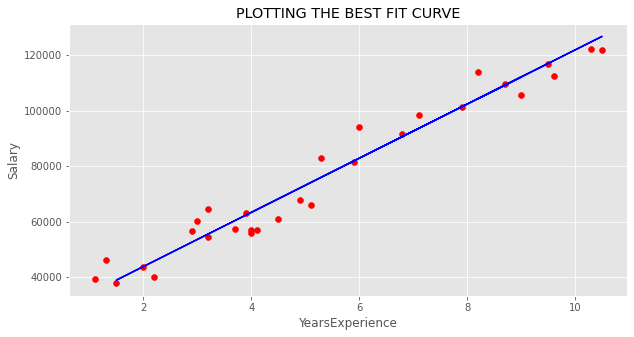

In [8]:
plt.figure(figsize=(10,5))
plt.plot(testx,y_pred,color='blue',label="Best Fit Line")
plt.scatter(X,y,color='red',label="Data points")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("PLOTTING THE BEST FIT CURVE")
plt.show()